In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.callbacks import ModelCheckpoint
from sklearn import metrics
import tensorflow as tf
import csv
import os

In [58]:
directory_list = os.listdir('C:/Users/Swathi Pratapa/Desktop/Assignments/MLSP/AssignementOne/test/Audio_Classification-MLSP-test')

directory_list = np.array(directory_list)

In [59]:
X_data = np.empty([1,128])
X_Final = np.empty([201,16])
# X_Final_N = np.empty([201,16])
X_mean = np.empty([1,16])
for i in range(0,201):
    File_name = directory_list[i]
    #File_Final = File_name[0]
    file_path = 'C:/Users/Swathi Pratapa/Desktop/Assignments/MLSP/AssignementOne/test/Audio_Classification-MLSP-test/'+File_name
    File_Pre = np.load(file_path)
    max_value = np.max(File_Pre)
    File_Pre = File_Pre/max_value
    a, rows, cols = File_Pre.shape
    for f in range(rows):
        X_data[0,f] = np.max(File_Pre[:,f,:])
    binsize = 8
    binnum = int(rows/binsize)
    for k in range(binnum):
        X_mean[0,k] = np.mean(X_data[0,k*binsize:(k+1)*binsize])
    X_Final[i,:] = X_mean

Printing the X_data shape

In [60]:
print(X_Final.shape)

(201, 16)


Loading the pre-trained model for prediction -  code for the model is in the file : ANN_16X1_Final_Metrics_COPY1

In [61]:
filepath = 'my_best_model.hdf5'

In [62]:
model1 = keras.models.load_model(filepath)

In [63]:
# Predict test data
y_pred = model1.predict(X_Final)

7/7 [==============================] - 0s 816us/step


In [64]:
# Print groundtruth and predicted class labels 
#actual = np.argmax(Y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)
#print(f"Ground Truth: {actual}")
print(f"Predicted: {predicted}")

Predicted: [5 7 3 0 0 4 4 4 4 4 3 4 4 4 4 1 4 0 4 4 4 8 6 5 5 5 5 5 2 6 5 2 6 6 5 9 9
 8 8 3 2 6 2 2 5 6 1 6 2 2 6 5 5 6 0 6 6 6 6 0 6 0 0 4 4 7 0 4 4 2 7 7 2 7
 3 3 3 3 4 8 8 8 3 8 8 7 8 3 8 8 2 8 5 8 8 3 8 9 5 7 7 9 3 1 8 0 8 3 6 6 9
 2 4 5 3 2 6 2 0 0 8 0 3 0 0 0 7 7 0 2 1 8 0 0 4 1 0 7 0 3 1 1 2 1 1 4 0 5
 2 0 0 1 0 2 2 2 2 2 2 2 2 3 2 8 2 2 2 2 3 2 2 8 2 2 4 2 7 8 4 0 7 8 4 1 1
 2 8 3 7 7 4 5 3 3 3 9 0 3 3 3 3]


# Calculating Metrics - Will be performed post release of ground truth

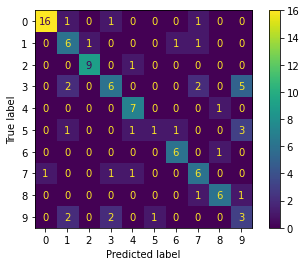

In [177]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])

cm_display.plot()

plt.show()

In [178]:
Accuracy = metrics.accuracy_score(actual, predicted)
print(Accuracy)

0.66


In [179]:
Precision_eachclass = metrics.precision_score(actual, predicted,average = None)
print(Precision_eachclass)
Precision = metrics.precision_score(actual, predicted,average = 'weighted')
print(Precision)

[0.94117647 0.5        0.9        0.6        0.7        0.5
 0.75       0.54545455 0.75       0.25      ]
0.6764144385026738


In [180]:
Sensitivity_recall = metrics.recall_score(actual, predicted,average = 'weighted')
print(Sensitivity_recall)

0.66


In [181]:
F1_score = metrics.f1_score(actual, predicted, average = 'weighted')
print(F1_score)

0.6540952380952381


Exporting the output for the test files

In [65]:
ypredtest_Names = [0]*201
Final_Test_Results = np.empty([201,2])
for i in range(201):
    if predicted[i] == 0 :
        ypredtest_Names[i] = 'Bark'
    elif predicted[i] == 1 :
        ypredtest_Names[i] = 'Crying_and_sobbing'
    elif predicted[i] == 2 :
        ypredtest_Names[i] = 'Doorbell'
    elif predicted[i] == 3 :
        ypredtest_Names[i] = 'Knock'
    elif predicted[i] == 4 :
        ypredtest_Names[i] = 'Meow'
    elif predicted[i] == 5 :
        ypredtest_Names[i] = 'Microwave_oven'
    elif predicted[i] == 6 :
        ypredtest_Names[i] = 'Shatter'
    elif predicted[i] == 7 :
        ypredtest_Names[i] = 'Siren'
    elif predicted[i] == 8 :
        ypredtest_Names[i] = 'Vehicle_horn_and_car_horn_and_honking'
    elif predicted[i] == 9 :
        ypredtest_Names[i] = 'Walk_and_footsteps'

        
ypredtest_Names = np.transpose(np.array([ypredtest_Names]))
print(ypredtest_Names.shape)
directory_list = np.resize(directory_list,(201,1))
print(directory_list.shape)

Final_Test_Results = np.hstack((directory_list,ypredtest_Names))
print(Final_Test_Results.shape)

(201, 1)
(201, 1)
(201, 2)


In [66]:
Final_Test_Results = np.vstack(([['fieldid', 'prediction']], Final_Test_Results))
with open ('ANN_Predicted_Testing12102022.csv','w',newline = '') as csvfile:
    my_writer = csv.writer(csvfile, delimiter = ' ')
    my_writer.writerows(Final_Test_Results)